## 1. Loading and Preprocessing

*   Load the breast cancer dataset from sklearn.
*   Preprocess the data to handle any missing values and perform necessary feature scaling.
*   Explain the preprocessing steps you performed and justify why they are necessary for this dataset.


In [ ]:
#Use the breast cancer dataset available in the sklearn library.
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
#loading dataset
data=load_breast_cancer()
#create a dataframe
df =pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
#store feature in x and target in y
x=df.drop('target',axis=1)
y=df['target']
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0




  a) **Preprocessing**



*   Checking the null values



In [ ]:
#Handling missing values
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


✅There is no null values in the dataset

In [ ]:
df.duplicated().sum()

0

✅There is no duplicates

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


b) **Scaling**

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
#create scalar object
scaler=StandardScaler()
#fit and transform features(x)
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

c) **Outlier Detection**

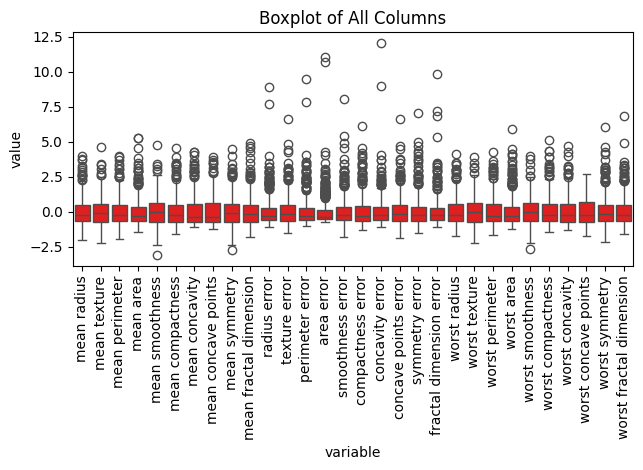

In [ ]:
# Create the boxplot to detect presence of outlier
import seaborn as  sns
import matplotlib.pyplot as plt
x_scaled_df = pd.DataFrame(x_scaled, columns=data.feature_names)
df_melted = pd.melt(x_scaled_df)  #melt dataframe for plotting
#create the boxplot
sns.boxplot(x="variable",y="value",data=df_melted,color='red')
plt.xticks(rotation=90)
plt.title("Boxplot of All Columns")
plt.tight_layout()
plt.show()

👉 The presence of points plotted beyond the whiskers indicates the existence of outliers in the dataset.

👉 Some features have more outliers than others, suggesting that certain variables are more prone to extreme values.
So,We can cap outlier by using IQR Method.

d) **Outlier Caping Using IQR method**

In [ ]:
#creating a function for capping outlier
def cap_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR

    df_capped = df.clip(lower=LB, upper=UB, axis=1)
    return df_capped

#calling function
x_capped = cap_outliers_iqr(x_scaled_df)

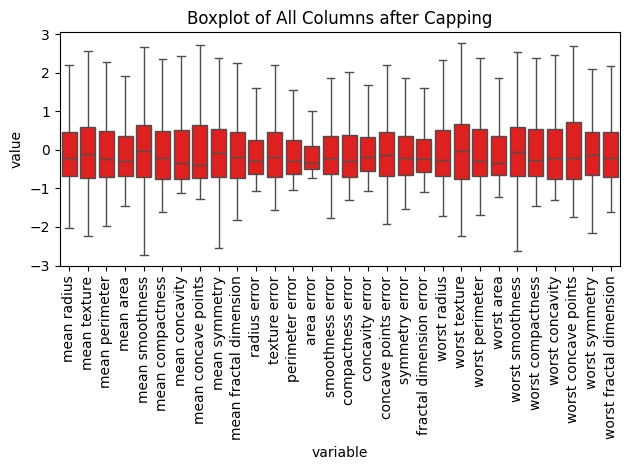

In [ ]:
#melting dataframe for plotting
X=pd.melt(x_capped)
#creating boxplot after capping outlier
sns.boxplot(x="variable",y="value",data=X,color='red')
plt.xticks(rotation=90)
plt.title("Boxplot of All Columns after Capping")
plt.tight_layout()
plt.show()

**Preprocessing steps are finished**



* **Data cleaning**:- The initial data exploration reveals no missing values or duplicates, indicating good data quality. However, the presence of outliers in several features necessitates outlier handling to prevent them from unduly influencing the analysis.

* **Feature Scaling**:- Using StandardScaler ensures that all features are on a similar scale, which is crucial for many machine learning algorithms that are sensitive to feature scales.

* **Outlier handling**:- The IQR method is employed to cap outliers, effectively reducing the impact of extreme values on the data distribution. The boxplots generated after outlier capping demonstrate the reduced presence of extreme values, confirming the effectiveness of this method.

* **Data Visualization**:- Using box plots to visualize the data distribution before and after outlier handling.



## **2. Classification Algorithm Implementation**

In [12]:
# Split the dataset into training and testing sets
#import necessary module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_capped, y)

#### a) Logistic Regression

In [13]:
#import module
from sklearn.linear_model import LogisticRegression
# Initialize and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Make predictions
logreg_pred = logreg.predict(X_test)
logreg_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

👉Logistic Regression is a statistical method used for binary classification problems.This part of the code focuses on building and using a Logistic Regression model to make predictions on the breast cancer dataset.

👉 This imports the Logistic Regression model, trains it using the training data, and then uses the trained model to predict the target values for the test data. The predicted values are then stored and displayed.

#### b) Decision Tree Classifier

In [14]:
#import module
from sklearn.tree import DecisionTreeClassifier
#initialize and train the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
dt_pred = dt.predict(X_test)
dt_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

.👉A Decision Tree is a supervised learning algorithm used for both classification and regression. It works by splitting the dataset into smaller subsets based on feature values, forming a tree-like structure.

The Decision Tree Classifier is suitable for the breast cancer dataset due to its interpretability, ability to handle non-linearity and feature importance, and flexibility with different data types.

#### c) Random Forest Classifier

In [15]:
#Import the module
from sklearn.ensemble import RandomForestClassifier
#initialize and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
rf_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

👉 Random Forest is an ensemble learning method that combines multiple Decision Trees to improve accuracy and reduce overfitting. It is widely used for classification and regression tasks.

👉 How it works:-
 1. Bootstrap Sampling (Bagging):
The algorithm creates multiple subsets of the training data are created using random sampling with replacement.Each subset is used to train an individual Decision Tree.

2. Decision Tree Construction: A decision tree is trained on each subset of the data.

3. Random Feature Selection:
At each node of the decision tree, a random subset of features is considered for splitting, further increasing diversity among the trees.

4. Ensemble Prediction: For classification, the predictions from all individual trees are aggregated, and the class with the most votes becomes the final prediction.

The Random Forest Classifier is suitable for the breast cancer dataset because it tends to provide high accuracy, is robust to outliers and noise, offers feature importance insights, handles non-linearity, and reduces overfitting. It is a powerful and versatile algorithm that often performs well on a variety of datasets, including medical datasets like the breast cancer dataset.

#### d) Support Vector Machine (SVM)

In [16]:
#import the module
from sklearn.svm import SVC
# intialize and Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions
svm_pred = svm_classifier.predict(X_test)
svm_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

👉SVC uses a set of labeled training examples to find a decision boundary that separates the data points into different classes. The decision boundary is represented as a linear function, and the goal is to find the boundary that maximizes the separation between the classes

SVM is suitable for the breast cancer dataset due to its effectiveness in high-dimensional spaces, ability to handle non-linearity, regularization, and good generalization capabilities

#### e) k-Nearest Neighbors (k-NN)

In [17]:
#Import module
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initilize and train the model
knn.fit(X_train, y_train)
#Make predictions
knn_pred=knn.predict(X_test)
knn_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

K-Nearest Neighbors (KNN) is a simple yet powerful supervised learning algorithm used for classification and regression. It is based on the idea that data points with similar features tend to belong to the same class.

How it works:

1. **Storing Data**: k-NN stores all the training data points.

2. **Calculating Distances**: When a new data point needs to be classified, it calculates the distance between the new point and all the stored data points.

3. **Finding Nearest Neighbors**: It identifies the k nearest data points (neighbors) based on the calculated distances.

4. **Majority Voting (Classification)**: For classification, the algorithm assigns the new data point to the class that is most frequent among its k nearest neighbors.

k-NN can be a suitable algorithm for the breast cancer dataset due to its simplicity, ability to handle non-linear relationships, and no separate training phase.

## **3. Model Comparison**

a) Compare the performance of the five classification algorithms.

b) Which algorithm performed the best and which one performed the worst?






In [18]:
#Import necessary modules
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

predictions = {
    "Logistic Regression": logreg_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    " Support Vector Machine": svm_pred,
    "k-Nearest Neighbors": knn_pred,
}

# Initialize a dictionary to store metrics
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

#  compute metrics for each model
for model_name, y_pred in predictions.items():
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, average='macro'))
    results["Recall"].append(recall_score(y_test, y_pred, average='macro'))
    results["F1-Score"].append(f1_score(y_test, y_pred, average='macro'))

results

{'Model': ['Logistic Regression',
  'Decision Tree',
  'Random Forest',
  ' Support Vector Machine',
  'k-Nearest Neighbors'],
 'Accuracy': [0.951048951048951,
  0.951048951048951,
  0.9790209790209791,
  0.9790209790209791,
  0.972027972027972],
 'Precision': [0.9534090909090909,
  0.9504283965728274,
  0.9770984665052462,
  0.9796001631986944,
  0.9738300492610837],
 'Recall': [0.945131845841785,
  0.9478701825557809,
  0.9796146044624746,
  0.9768762677484788,
  0.9682555780933063],
 'F1-Score': [0.948795334799734,
  0.9490973811339944,
  0.9783037475345168,
  0.9781845919145691,
  0.9708282333741329]}

In [19]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                     Model  Accuracy  Precision    Recall  F1-Score
0      Logistic Regression  0.951049   0.953409  0.945132  0.948795
1            Decision Tree  0.951049   0.950428  0.947870  0.949097
2            Random Forest  0.979021   0.977098  0.979615  0.978304
3   Support Vector Machine  0.979021   0.979600  0.976876  0.978185
4      k-Nearest Neighbors  0.972028   0.973830  0.968256  0.970828


In [20]:
# Sort by F1-Score
results_df = results_df.sort_values(by="F1-Score",ascending=False)
print(results_df)

                     Model  Accuracy  Precision    Recall  F1-Score
2            Random Forest  0.979021   0.977098  0.979615  0.978304
3   Support Vector Machine  0.979021   0.979600  0.976876  0.978185
4      k-Nearest Neighbors  0.972028   0.973830  0.968256  0.970828
1            Decision Tree  0.951049   0.950428  0.947870  0.949097
0      Logistic Regression  0.951049   0.953409  0.945132  0.948795


✅ Random Forest is the best-performing model in terms of overall F1-Score, Precision, and Recall.

✅ Decision Trees and Logistic Regression underperform, making them less suitable for this dataset.

✅ Logistic Regression has low F1-Score.So,it is the worst model here.